In [1]:
import tensorflow as tf
import keras as ker
from keras.datasets import mnist
import matplotlib.pyplot as plt
print('tf version : ' , tf.__version__)
print('keras version : ' , ker.__version__)

Using TensorFlow backend.


tf version :  1.4.0
keras version :  2.1.5


In [2]:
(x_train_image,y_train_label), \
(x_test_image,y_test_label) = mnist.load_data()
print('train data=', len(x_train_image)," ; 維度 : ", x_train_image.shape)
print('train label=', len(y_train_label),y_train_label.shape)

train data= 60000  ; 維度 :  (60000, 28, 28)
train label= 60000 (60000,)


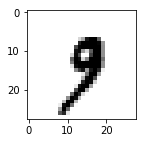

In [3]:
def plot_image(image):
    fig = plt.gcf() 
    fig.set_size_inches(2,2) #設定顯示圖形大小
    plt.imshow(image,cmap='binary') #顯示圖形
    plt.show()
plot_image(x_test_image[1000])

In [4]:
# images(數字影像) labels(真實值) prediction(預測結果) idx(開始顯示資料的index) num(顯示的資料筆數，上限為25)
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #設定顯示圖形大小
    if num>25: num =25 #顯示的資料筆數，上限為25
    for i in range(0,num):
        ax =plt.subplot(5,5,1+i) #建立子圖形有五行五列
        ax.imshow(images[idx], cmap='binary')
        title = "label" + str(labels[idx]) #建立子圖形title之標籤欄位
        if len(prediction)>0: #假如有傳入預測結果
            title += ", predict=" + str(prediction[idx]) #子圖形title加入預測結果
        ax.set_title(title,fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx+=1 #讀取下一筆
    plt.show()
    

test data= 10000 (10000, 28, 28)
test labe;= 10000 (10000,)


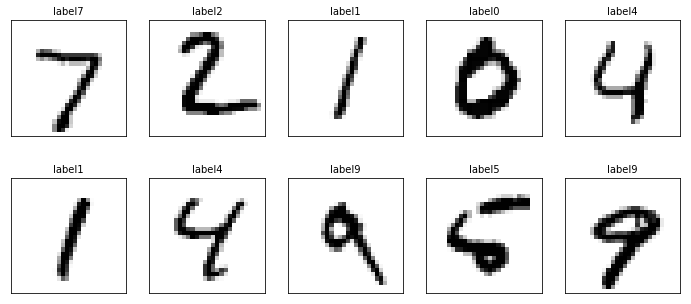

In [5]:
print('test data=', len(x_test_image),x_test_image.shape)
print('test labe;=', len(y_test_label),y_test_label.shape)
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [6]:
#擷取數字影像特徵值 => 轉化為1維784的向量
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')
print('x_Train',x_Train.shape)
print('x_Test',x_Test.shape)

x_Train (60000, 784)
x_Test (10000, 784)


In [7]:
#數字image標準化 (0~255)
x_Train_Normalize = x_Train/255
x_Test_Normalize = x_Test /255
x_Train_Normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
#One-hot encoding轉換
from keras.utils import np_utils
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# 加入Dense神經網路層
model = Sequential()
#建立輸入層&隱藏層
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))
#建立輸出層
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))


In [12]:
#模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#模型設定
model.compile(loss="categorical_crossentropy",
            optimizer="adam",metrics=['accuracy'])

In [14]:
#模型訓練
train_history = model.fit(x=x_Train_Normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4418 - acc: 0.8833 - val_loss: 0.2184 - val_acc: 0.9410
Epoch 2/10
 - 1s - loss: 0.1888 - acc: 0.9454 - val_loss: 0.1523 - val_acc: 0.9587
Epoch 3/10
 - 1s - loss: 0.1321 - acc: 0.9617 - val_loss: 0.1244 - val_acc: 0.9636
Epoch 4/10
 - 1s - loss: 0.1001 - acc: 0.9716 - val_loss: 0.1137 - val_acc: 0.9664
Epoch 5/10
 - 1s - loss: 0.0809 - acc: 0.9771 - val_loss: 0.1019 - val_acc: 0.9703
Epoch 6/10
 - 1s - loss: 0.0649 - acc: 0.9819 - val_loss: 0.0934 - val_acc: 0.9710
Epoch 7/10
 - 1s - loss: 0.0532 - acc: 0.9857 - val_loss: 0.0865 - val_acc: 0.9724
Epoch 8/10
 - 1s - loss: 0.0450 - acc: 0.9875 - val_loss: 0.0866 - val_acc: 0.9737
Epoch 9/10
 - 1s - loss: 0.0370 - acc: 0.9903 - val_loss: 0.0810 - val_acc: 0.9760
Epoch 10/10
 - 1s - loss: 0.0304 - acc: 0.9922 - val_loss: 0.0830 - val_acc: 0.9749


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],
               loc='upper left')


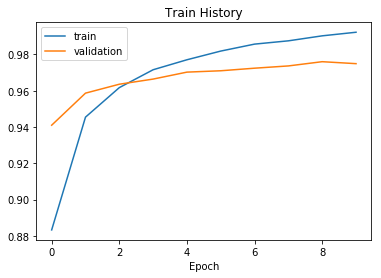

In [16]:
show_train_history(train_history,'acc','val_acc')